<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Task 2: Generate Descriptive Statistics and Visualizations

For the "Median value of owner-occupied homes" provide a boxplot

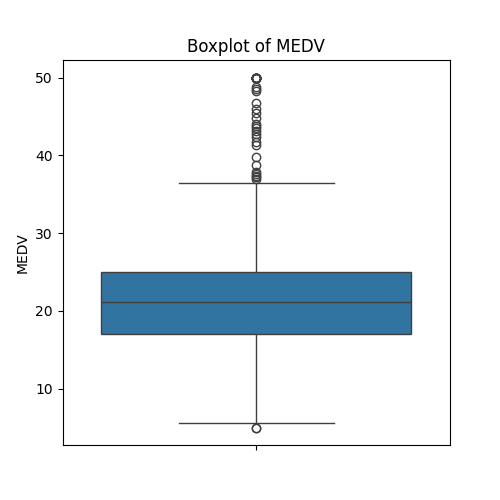

In [5]:
pyplot.figure(figsize=(5,5))
sns.boxplot(y='MEDV', data=boston_df, orient='v')
pyplot.title("Boxplot of MEDV")
pyplot.show()

Provide a  bar plot for the Charles river variable

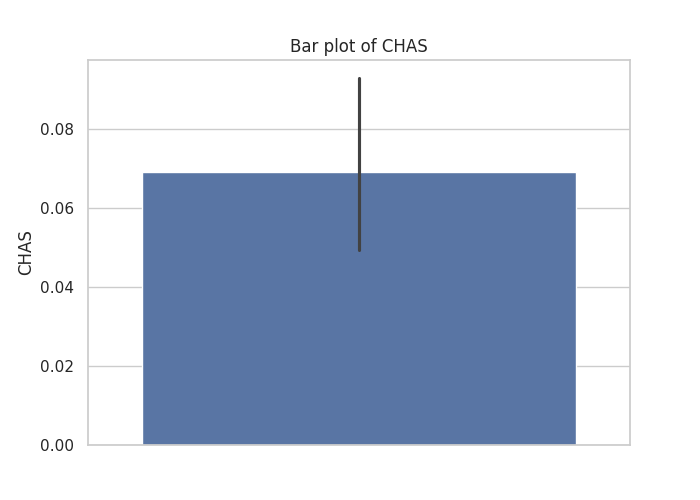

In [6]:
pyplot.figure(figsize=(7,5))
sns.set(style="whitegrid")
sns.barplot(y='CHAS', data=boston_df)
pyplot.title("Bar plot of CHAS")
pyplot.show()

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

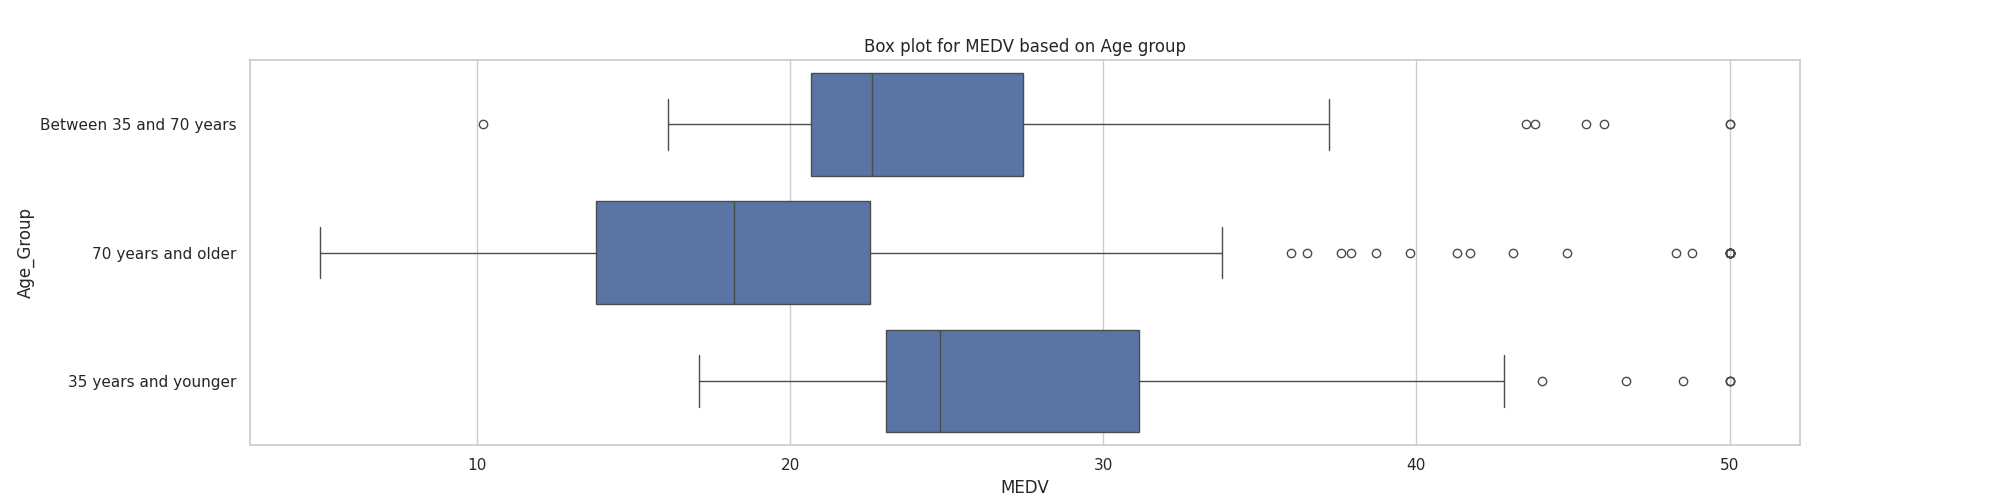

In [7]:
boston_df.loc[(boston_df["AGE"] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), 'Age_Group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70), 'Age_Group'] = '70 years and older'
pyplot.figure(figsize=(20,5))
sns.boxplot(x="MEDV", y="Age_Group", data=boston_df)
pyplot.title("Box plot for MEDV based on Age group")
pyplot.show()

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

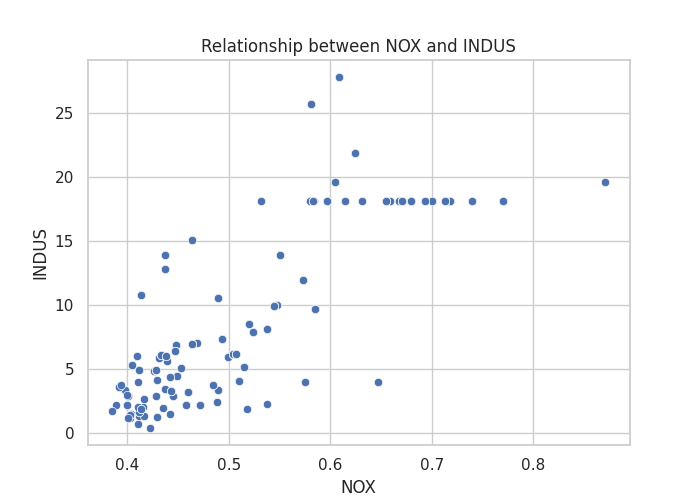

In [8]:
pyplot.figure(figsize=(7,5))
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
pyplot.title("Relationship between NOX and INDUS")
pyplot.show()

Observation : Linear relationship (increasing trend) till NOX=0.6, 

Create a histogram for the pupil to teacher ratio variable

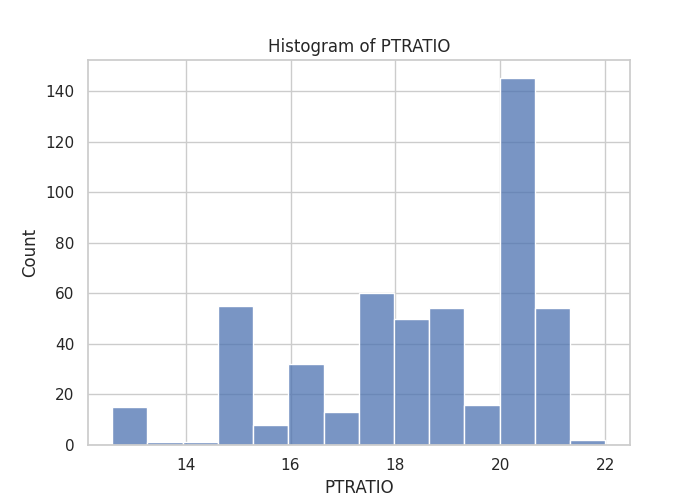

In [9]:
pyplot.figure(figsize=(7,5))
sns.histplot(x="PTRATIO", data=boston_df)
pyplot.title("Histogram of PTRATIO")
pyplot.show()

Task 3: Use the appropriate tests to answer the questions provided.

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis (H_0) : Both average MEDV are same. Alternate Hypothesis (H_1) : Both average MEDV are not the same.

In [10]:
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == 0]["MEDV"], boston_df[boston_df["CHAS"] == 1]["MEDV"])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Conclusion : Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by Charles river

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [11]:
boston_df.loc[(boston_df["AGE"] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), 'Age_Group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70), 'Age_Group'] = '70 years and older'

Null Hypothesis (H_0) : Mu_1 = Mu_2 = Mu_3. Alternate hypothesis (H_1) : Atleast one of them differ

In [12]:
thirtyfive_lower_eval = boston_df[boston_df['Age_Group'] == '35 years and younger']['MEDV']
thirtyfive_seventy_lower_eval = boston_df[boston_df['Age_Group'] == 'Between 35 and 70 years']['MEDV']
seventy_older_eval = boston_df[boston_df['Age_Group'] == '70 years and older']['MEDV']

In [13]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_eval, thirtyfive_seventy_lower_eval, seventy_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion : Since p-value is more than 0.05, we fail to reject the null hypothesis. Thus, there's no difference in median values of houses for each proportion of owner occupied units built prior to 1940

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null hypothesis (H_0) : NOX is not correlated with INDUS. Alternate hypothesis (H_1) : NOX is correlated with INDUS.

In [14]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

Conclusion : Since the p-value < 0.05, we reject the null hypothesis and conclude that there exists a relationship between NOX and INDUS

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null hypothesis (H_0): Weighted distances to five Boston employment centres are not related to median value of owner occupied homes. Alternate hypothesis (H_1) : Weighted distances to five Boston employment centres are related to median value of owner occupied homes

In [16]:
y = boston_df['MEDV']
x = boston_df['DIS']
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
prdictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        05:31:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion : p<0.05, there is evidence of correlation between MEDV and DIS. We reject the null hypothesis.